In [3]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('../data/chinook.db')

### Пример 1: топ жанры по выручке

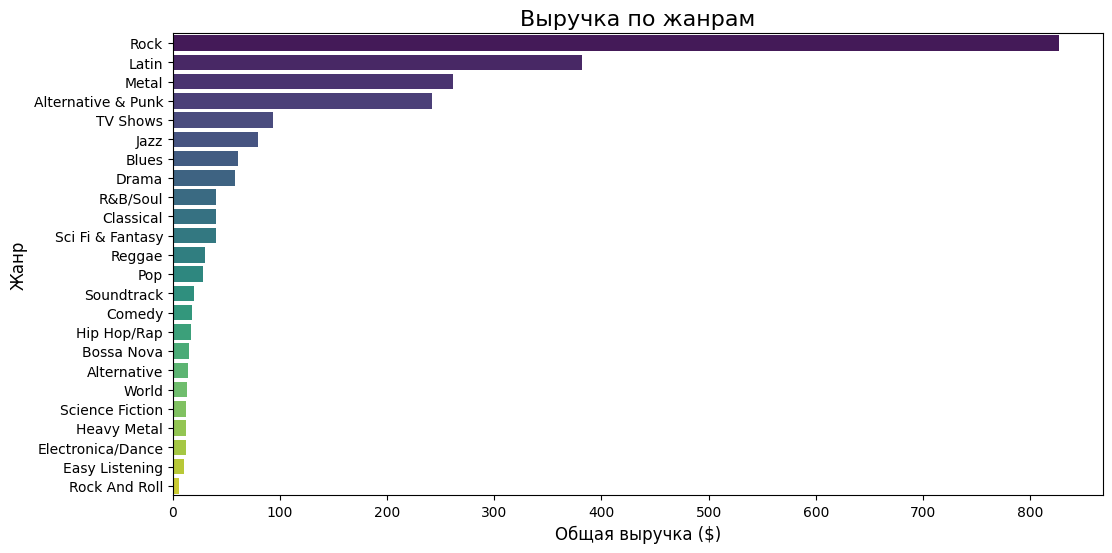

In [18]:
query = """
SELECT 
    g.Name AS Genre,
    SUM(il.UnitPrice * il.Quantity) AS TotalRevenue
FROM 
    InvoiceLine il
JOIN 
    Track t ON il.TrackId = t.TrackId
JOIN 
    Genre g ON t.GenreId = g.GenreId
GROUP BY 
    g.Name
ORDER BY 
    TotalRevenue DESC;
"""
df_genre_revenue = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_genre_revenue, x='TotalRevenue', y='Genre', hue='Genre', palette='viridis', legend=False)
plt.title('Выручка по жанрам', fontsize=16)
plt.xlabel('Общая выручка ($)', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.show()

### Пример 2: выручка по странам

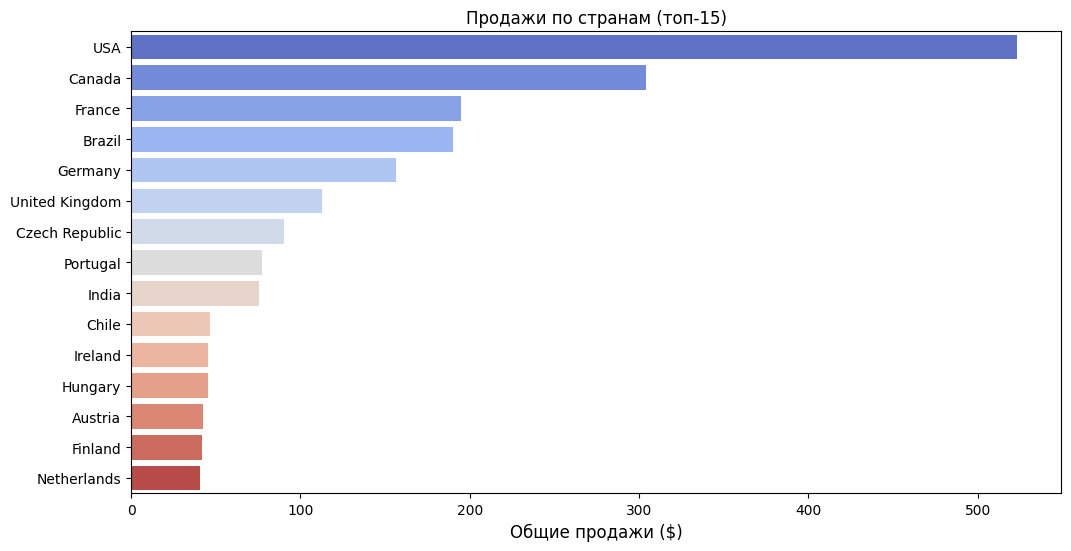

In [47]:
query = """
SELECT 
    c.Country,
    SUM(i.Total) AS TotalSales
FROM 
    Invoice i
JOIN 
    Customer c ON i.CustomerId = c.CustomerId
GROUP BY 
    c.Country
ORDER BY 
    TotalSales DESC;
"""
df_country_sales = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_country_sales.head(15), x='TotalSales', y='Country', hue='Country', palette='coolwarm', legend=False)
plt.title('Продажи по странам (топ-15)', fontsize=12)
plt.xlabel('Общие продажи ($)', fontsize=12)
plt.ylabel('')
plt.show()

### Кто из клиентов покупает чаще всего?

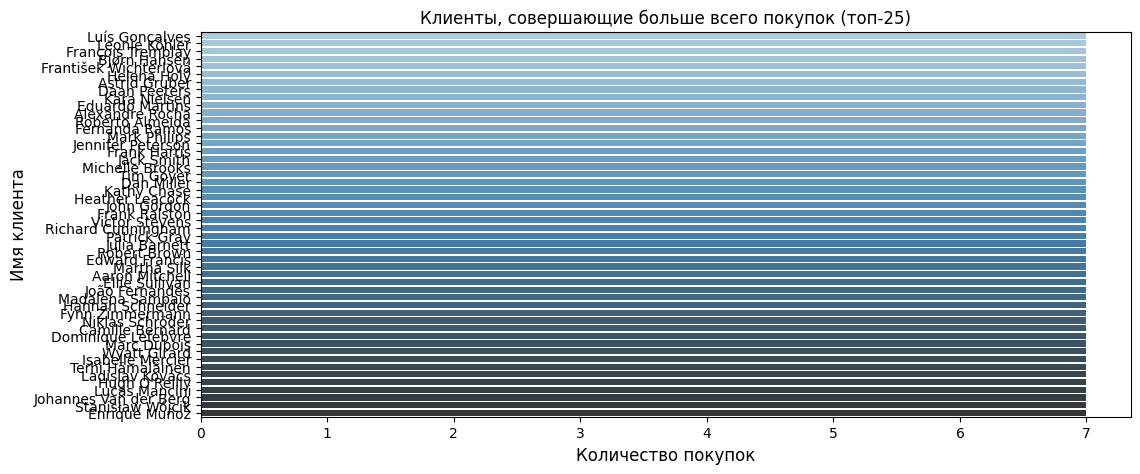

In [48]:
query = """
SELECT 
    c.FirstName || ' ' || c.LastName AS CustomerName,
    COUNT(i.InvoiceId) AS PurchaseCount
FROM 
    Customer c
JOIN 
    Invoice i ON c.CustomerId = i.CustomerId
GROUP BY 
    c.CustomerId
ORDER BY 
    PurchaseCount DESC;
"""
df_customer_purchases = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 5))
sns.barplot(data=df_customer_purchases.head(10), x='PurchaseCount', y='CustomerName', hue='CustomerName', palette='Blues_d', legend=False)
plt.title('Клиенты, совершающие больше всего покупок (топ-1)', fontsize=12)
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Имя клиента', fontsize=12)
plt.show()

In [55]:
query = """
SELECT 
    COUNT(i.InvoiceId) AS PurchaseCount,
    COUNT(DISTINCT c.CustomerId) AS CustomerCount
FROM 
    Customer c
JOIN 
    Invoice i ON c.CustomerId = i.CustomerId
GROUP BY 
    c.CustomerId
ORDER BY 
    PurchaseCount;
"""
pd.read_sql_query(query, conn)

,PurchaseCount,CustomerCount
0,6,1
1,7,1
2,7,1
3,7,1
4,7,1
5,7,1
6,7,1
7,7,1
8,7,1
9,7,1


### Как распределены покупки по времени?

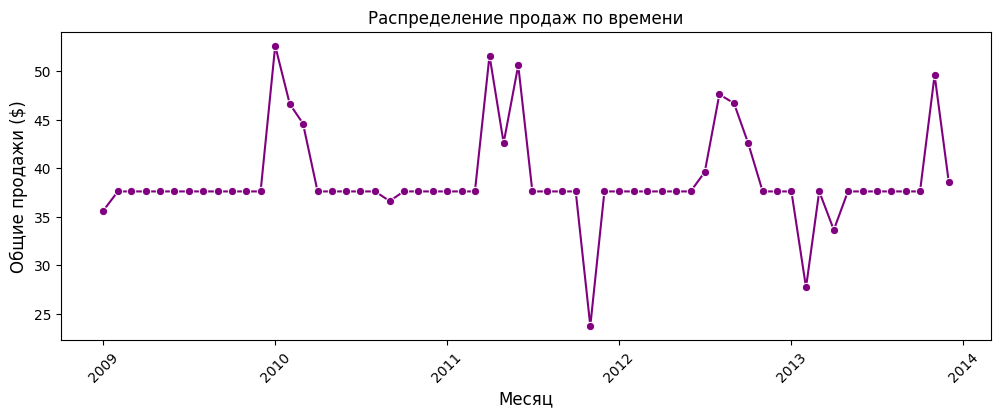

In [40]:
query = """
SELECT 
    strftime('%Y-%m', InvoiceDate) AS Month,
    SUM(Total) AS MonthlySales
FROM 
    Invoice
GROUP BY 
    Month
ORDER BY 
    Month;
"""
df_monthly_sales = pd.read_sql_query(query, conn)

df_monthly_sales['Month'] = pd.to_datetime(df_monthly_sales['Month'])

plt.figure(figsize=(12, 4))
sns.lineplot(data=df_monthly_sales, x='Month', y='MonthlySales', marker='o', color='purple')
plt.title('Распределение продаж по времени', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Общие продажи ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Какие менеджеры ведут самых "дорогих" клиентов?

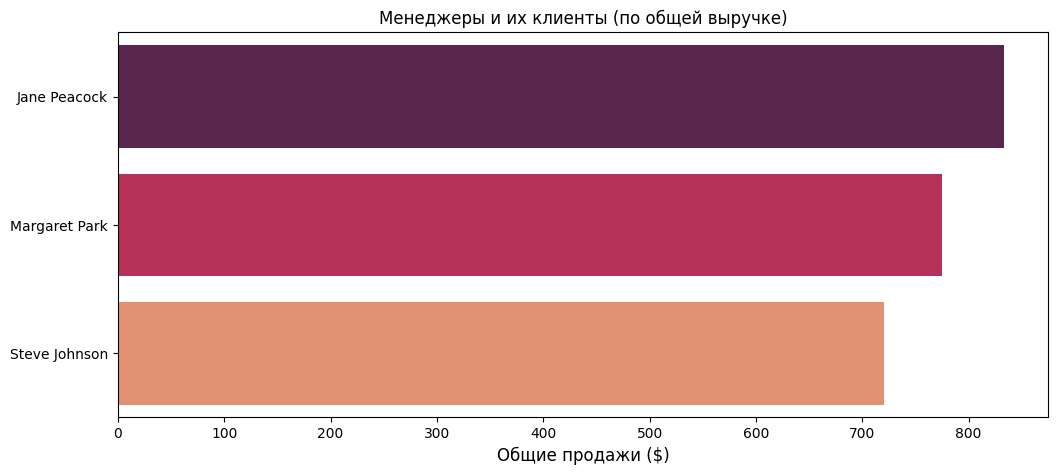

In [44]:
query = """
SELECT 
    e.FirstName || ' ' || e.LastName AS ManagerName,
    SUM(i.Total) AS TotalSales
FROM 
    Employee e
JOIN 
    Customer c ON e.EmployeeId = c.SupportRepId
JOIN 
    Invoice i ON c.CustomerId = i.CustomerId
GROUP BY 
    e.EmployeeId
ORDER BY 
    TotalSales DESC;
"""
df_manager_sales = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 5))
sns.barplot(data=df_manager_sales, x='TotalSales', y='ManagerName', hue='ManagerName', palette='rocket', legend=False)
plt.title('Менеджеры и их клиенты (по общей выручке)', fontsize=12)
plt.xlabel('Общие продажи ($)', fontsize=12)
plt.ylabel('')
plt.show()